# Exploratory Data Analysis
This python notebook contains the questions asked during my EDA and graphs generated based on those questions.

In [16]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [17]:
# import datasets 
games = pd.read_csv("datasets/games.csv")
players = pd.read_csv("datasets/players.csv")
stats = pd.read_csv("datasets/stats.csv")
teams = pd.read_csv("datasets/teams.csv")

## What is the distribution of scores for home team vs visiting team?

<function matplotlib.pyplot.show(close=None, block=None)>

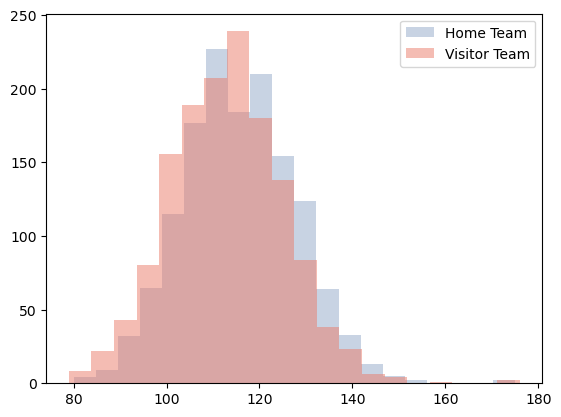

In [18]:
plt.hist(games[['home_team_score']], bins = 20, alpha = 0.5, label = "Home Team", color = '#93A9C8')
plt.hist(games[['visitor_team_score']], bins = 20, alpha = 0.5, label = "Visitor Team", color = '#EB7B69')
plt.legend()
plt.show

In [19]:
print(games['home_team_score'].mean())
print(games['visitor_team_score'].mean())

115.63521126760564
112.9225352112676


The Home team score distribution is higher on the x axis than Visitor team score. We also can see from the means that the mean home team score is higher than visitor team score. 

## Which teams have the highest mean scores?